 # End-to-End Machine Learning for Real Estate Price Prediction

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [216]:
!pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/f9/77/a5d0658224c40255786c49d05ab99f251bd5f11adc8d2cb1dfa846212bac/spacy-3.7.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/ad/99/c8956679e0702b91d1558cc1f0b39c1f36ab555bdde1fca6b31bc1174322/murmurhash-1.0.10-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/2b/9e/18c6e7ac58ac84a02d3db0f43771515cdc4621b2e8e7062939dd6adef0df/cymem-2.0.8-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.

  Obtaining dependency information for cloudpathlib<0.16.0,>=0.7.0 from https://files.pythonhosted.org/packages/97/a2/e9a5bd762cccefc92a98c87354a65a8b75c280ab187a05e6d5851adbdae6/cloudpathlib-0.15.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 4.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.4/492.4 kB 4.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 5.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━

In [229]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.4 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import re
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from nltk.util import ngrams
import spacy
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

## load data

In [45]:
df_in=pd.read_parquet('../data/bizbuysell.dataset.2.parquet')

In [46]:
df_in.shape

(252852, 33)

In [47]:
df_in.head()

,id,src,url,title,desc,local,region,location,title_loc,categories,...,COUNTY_SEQUENCE,COUNTY_NUMERIC,COUNTY_NAME,PRIMARY_LATITUDE,PRIMARY_LONGITUDE,DATE_CREATED,DATE_EDITED,STATE_NAME,POVERTY_PERCENT,MEDIAN_HOUSEHOLD_INCOME
0,2067319.0,details,https://www.bizbuysell.com/Business-Real-Estat...,Popular Marina in Central New Jersey in Middle...,It is fully owned by a man and his wife since ...,Middlesex,New Jersey,"Middlesex County, NJ","Central New Jersey in Middlesex County, New Je...","[Real Estate For Sale, New Jersey, Marinas and...",...,1.0,23.0,Middlesex,40.572603,-74.492654,09/08/1979,03/17/2008,New Jersey,8.0,98992.0
1,1990890.0,details,https://www.bizbuysell.com/Business-Real-Estat...,"High Exposure in Mays Landing, New Jersey - Bi...",AMAZING OPPORTUNITY! Priced to sell and ready ...,Mays Landing,New Jersey,"Mays Landing, NJ (Atlantic County)","Mays Landing, New Jersey","[Real Estate For Sale, New Jersey, Other, Mays...",...,1.0,1.0,Atlantic,39.452339,-74.727663,09/08/1979,12/06/2013,New Jersey,15.1,65693.0
2,2050006.0,details,https://www.bizbuysell.com/Business-Real-Estat...,"Rental Units with Real Estate in Randolph, New...",This is a 6 unit Airbnb with an average occupa...,Randolph,New York,"Randolph, NY (Cattaraugus County)","Randolph, New York","[Real Estate For Sale, New York, Hotels, Rando...",...,1.0,9.0,Cattaraugus,42.162005,-78.975317,01/23/1980,11/08/2019,New York,16.1,54602.0
3,2039720.0,details,https://www.bizbuysell.com/Business-Real-Estat...,"Duplex, Short term or Long term in Pinellas Co...",Rare Largo/Seminole area duplex centrally loca...,Pinellas,Florida,"Pinellas County, FL","Pinellas County, Florida","[Real Estate For Sale, Florida, Other, Pinella...",...,1.0,103.0,Pinellas,27.905111,-82.799568,08/28/1987,06/04/2021,Florida,12.3,61851.0
4,1576680.0,details,https://www.bizbuysell.com/Business-Real-Estat...,"Major Price Reduction Rest/Tavern/ 13,000sq. f...",Price reduced to $850. 000 MAKE AN OFFER!!!!!!...,Baltimore,Maryland,"Baltimore, MD (Baltimore City County)","Baltimore, Maryland","[Real Estate For Sale, Maryland, Bars, Pubs an...",...,1.0,510.0,Baltimore (city),39.290385,-76.612189,09/12/1979,03/17/2008,Maryland,22.9,54068.0


## outlier detection

<Axes: xlabel='price'>

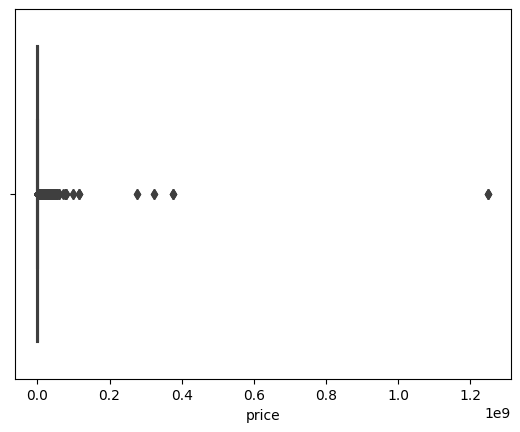

In [48]:
sns.boxplot(x=df_in["price"])

In [49]:
def pct_method(data, level):
    # Upper and lower limits by percentiles
    upper = np.percentile(data, 100 - level)
    lower = np.percentile(data, level)
    # Returning the upper and lower limits
    return [lower, upper]

In [50]:
def iqr_method(data):
    # Calculating the IQR
    perc_75 = np.percentile(data, 75)
    perc_25 = np.percentile(data, 25)
    iqr_range = perc_75 - perc_25
    # Obtaining the lower and upper bound
    iqr_upper = perc_75 + 1.5 * iqr_range
    iqr_lower = perc_25 - 1.5 * iqr_range
    # Returning the upper and lower limits
    return [iqr_lower, iqr_upper]

In [51]:
def std_method(data):
    # Creating three standard deviations away boundaries
    std = np.std(data)
    upper_3std = np.mean(data) + 3 * std
    lower_3std = np.mean(data) - 3 * std
    # Returning the upper and lower limits
    return [lower_3std, upper_3std]

In [52]:
def outlier_bool(data, level=1, continuous=False, log=False):
    # Taking logs is specified
    if log is True:
        data = np.log(data + 1)
    # Obtaining the ranges
    pct_range = pct_method(data, level)
    iqr_range = iqr_method(data)
    std_range = std_method(data)
    if continuous is False:
        # Setting the lower limit fixed for discrete variables
        low_limit = np.min(data)
        high_limit = np.max([pct_range[1],
                             iqr_range[1],
                             std_range[1]])
    elif continuous is True:
        low_limit = np.min([pct_range[0],
                            iqr_range[0],
                            std_range[0]])
        high_limit = np.max([pct_range[1],
                             iqr_range[1],
                             std_range[1]])
    # Restrict the data with the minimum and maximum
    outlier = data.between(low_limit, high_limit)
    # Return boolean
    return outlier

In [58]:
dfa=df_in
dfa=dfa.dropna( subset='price')
dfa['outlier']=outlier_bool(dfa['price'], continuous=True)

<Axes: xlabel='price', ylabel='Count'>

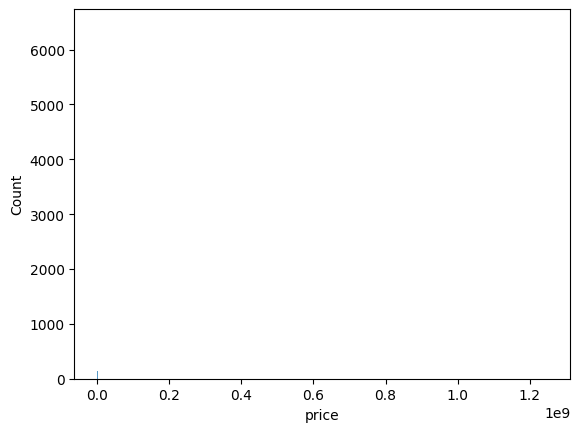

In [59]:
sns.histplot(dfa, x="price")

In [60]:
dfb=dfa[dfa.outlier== False]

<Axes: xlabel='price', ylabel='Count'>

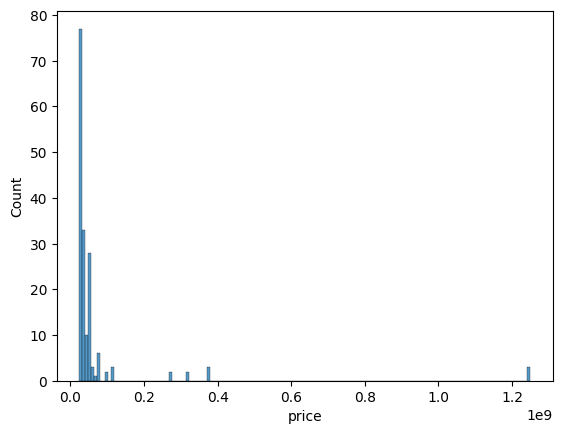

In [61]:
sns.histplot(dfb, x="price")

In [62]:
print('Price Min:',dfa.price.min())
print('Price Cutoff Min:',dfb.price.min())
print('Price Cutoff Max:',dfb.price.max())
print('Price Max:',dfa.price.max())

Price Min: 1.0
Price Cutoff Min: 24500000.0
Price Cutoff Max: 1250000000.0
Price Max: 1250000000.0


## clustering

In [127]:
dfb['cat_len']=dfb['categories'].apply(lambda x: len(x))

In [128]:
dfc=dfb[dfb.cat_len > 1]
dfc['cat']=dfc['categories'].apply(lambda x: x[-2])

In [129]:
label_encoder = preprocessing.LabelEncoder()
dfc['cat_n'] = label_encoder.fit_transform(dfc['cat'])

In [130]:
dfc.head()

,id,src,url,title,desc,local,region,location,title_loc,categories,...,PRIMARY_LONGITUDE,DATE_CREATED,DATE_EDITED,STATE_NAME,POVERTY_PERCENT,MEDIAN_HOUSEHOLD_INCOME,outlier,cat_len,cat,cat_n
458,2085697.0,details,https://www.bizbuysell.com/Business-Real-Estat...,Off market Hotels for sell in New York City in...,"Off market 88 rooms Hotel for sell, close ny L...",College Point,New York,"College Point, NY (Queens County)","New York City in College Point, New York","[Real Estate For Sale, New York, Hotels, Colle...",...,-73.845968,01/23/1980,11/02/2007,New York,13.6,72807.0,False,4,Hotels,54
494,2071370.0,details,https://www.bizbuysell.com/Business-Real-Estat...,Orange Lake Rv Resort Development Lakefront Hi...,"Orange Lake RV Resort Development, is set to b...",Reddick,Florida,"Reddick, FL (Marion County)","Reddick, Florida","[Real Estate For Sale, Florida, Campgrounds an...",...,-82.197318,10/19/1979,03/20/2008,Florida,13.6,54555.0,False,4,Campgrounds and RV Parks,12
915,2038551.0,details,https://www.bizbuysell.com/Business-Real-Estat...,Atlanta Area EXPRESS CAR WASH Development Port...,6 Express locations around the Atlanta area re...,Fulton,Georgia,"Fulton County, GA","Fulton County, Georgia","[Real Estate For Sale, Georgia, Car Washes, Fu...",...,-84.467009,05/08/1996,06/04/2021,Georgia,13.7,82820.0,False,4,Car Washes,14
2028,2015344.0,details,https://www.bizbuysell.com/Business-Opportunit...,New Technology Solar Business (Proven and Pate...,Proven and Patented Solar Business with Infini...,Horry,South Carolina,"Horry County, SC (Relocatable)","Horry County, South Carolina","[Business For Sale, South Carolina, Energy and...",...,-79.134207,07/13/1980,None,South Carolina,12.6,56342.0,False,4,Energy and Petroleum,30
3774,1958343.0,details,https://www.bizbuysell.com/Business-Opportunit...,40 Year Old Rx-pharma Manufacturing Business i...,This company for sale is a healthcare company ...,New York,New York,"New York, NY (New York County)","New York, New York","[Business For Sale, New York, Websites and Eco...",...,-74.005973,01/23/1980,11/19/2010,New York,17.4,84371.0,False,4,Websites and Ecommerce,138


In [131]:
dfd=dfc[['price','cat_n']]

In [132]:
# Number of maximum clusters tried 
max_cluster = 5
# Initialise dictionary 
sil_graph = {}
# Looping starting with 2 clusters and then
for cluster in range(2, max_cluster + 1):    
    # Calculate the kmeans with clusters
    kmeans = KMeans(n_clusters=cluster, random_state=0).fit(dfd)
    # Calculate the kmeans labels
    sil_graph[cluster] = silhouette_score(dfd, kmeans.labels_)

In [133]:
sil_graph

{2: 0.965076746452159,
 3: 0.9341752079160326,
 4: 0.7645378861895556,
 5: 0.6839253607950417}

In [134]:
# Choosing decided cluster level
cluster_level = 2
# Initialising cluster level
kmeans = KMeans(n_clusters=cluster_level, random_state=0).fit(dfd)
# Assign cluster labels
cluster_label = kmeans.labels_

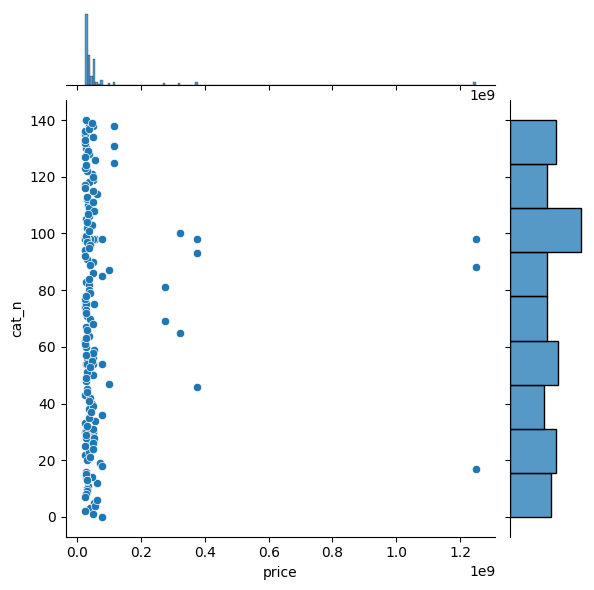

In [135]:
sns.jointplot(x="price", y="cat_n", data=dfd)

# feature creation

In [159]:
def proc_cash_flow(x):
    r=re.search('[cC]ash\s+[fF]low:\s+\$?(\d[\d,]*)',x)
    if r is not None:
        r=r.groups()[0]
        r=r.replace(',','')
        return int(r)
    return r

In [160]:
dfc['cash_flow']=dfc['financials'].apply(proc_cash_flow)
dfc['log_cash_flow']=np.log(dfc['cash_flow'])

In [161]:
def proc_gross_revenue(x):
    r=re.search('[gG]ross\s+[rR]evenue:\s+\$?(\d[\d,]*)',x)
    if r is not None:
        r=r.groups()[0]
        r=r.replace(',','')
        return int(r)
    return r

In [162]:
dfc['gross_revenue']=dfc['financials'].apply(proc_gross_revenue)
dfc['log_gross_revenue']=np.log(dfc['gross_revenue'])

In [163]:
dfd=dfc.dropna( subset=['cash_flow','gross_revenue'])

In [164]:
dfd['f1']=np.log(dfd.MEDIAN_HOUSEHOLD_INCOME/dfd.price)

In [165]:
dfd['f2']=np.log(dfd.POVERTY_PERCENT*dfd.price)

In [166]:
dfd['f3']=np.log(dfd.cash_flow*dfc.gross_revenue)

In [168]:
#dfd.head()

# model selection

In [198]:
def cv_score(model, X, y, groups):
    # Perform the cross validation
    scores = cross_val_score(model, X, y,
                             cv=groups,
                             scoring='neg_mean_squared_error')
    # Taking the expe
    # of the numbers we are getting
    corrected_score = [np.sqrt(-x) for x in scores]
    return corrected_score

In [199]:
def gb_score(X, y):
    # Model assignment
    model = GradientBoostingRegressor
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=model(),
        param_grid={
            'learning_rate': [0.01, 0.1, 0.2, 0.3],
            'n_estimators': [100, 300, 500, 1000],
        },
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=0,
        n_jobs=-1)
    # Finding the best parameter
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    # Random forest regressor with specification
    gb = model(learning_rate=best_params["learning_rate"],
               n_estimators=best_params["n_estimators"],
               random_state=False,
               verbose=False)
    # Apply cross validiation on the model
    gb.fit(X, y)
    score = cv_score(gb, X, y, 5)
    # Return information
    return score, best_params, gb

In [200]:
X=dfd[['log_cash_flow','log_gross_revenue','f1','f2','f3']]
y=np.log(dfd.price)

In [201]:
%%capture
score, best_params, gb=gb_score(X, y)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [202]:
print( score, best_params, gb)

[0.16260573205277787, 1.5663525533698863, 0.25682334801602524, 0.4215995448074131, 0.10293195034550304] {'learning_rate': 0.3, 'n_estimators': 100} GradientBoostingRegressor(learning_rate=0.3, random_state=False, verbose=False)


# score model

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=28)

In [205]:
# Getting the predictions
gb_predictions = gb.predict(X_test)
# Bringing them back to normal scale and calculation of MAPE
scale_pred = np.exp(gb_predictions)
scale_y = np.exp(y_test)
mape = (abs(scale_pred - scale_y)/scale_y) * 100

In [209]:
mape_df=pd.DataFrame(mape)

In [211]:
mape_df

,price
14487,0.000009
34017,0.000012
8111,0.000004
16169,0.000010


<Axes: xlabel='index', ylabel='price'>

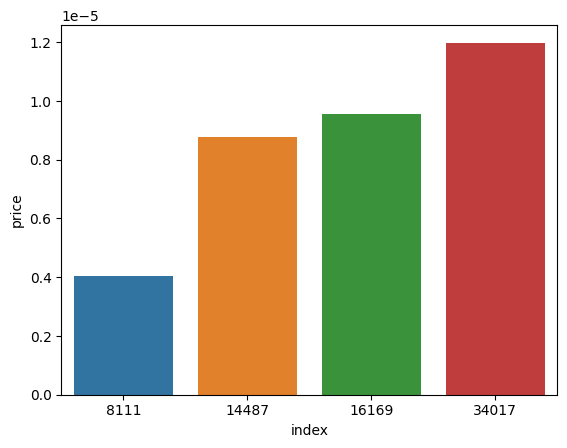

In [214]:
sns.barplot(mape_df.reset_index(),x='index',y='price')

# nlp prep

In [223]:
nlp = spacy.load("en_core_web_sm")

In [226]:
dff=dfd
dff['tok']=dff['desc'].apply(lambda x: nlp(x))

In [227]:
dff.iloc[0]

id                                                                 1833779.0
src                                                                  details
url                        https://www.bizbuysell.com/Business-Opportunit...
title                      Janitorial Cleaning Supply Packaging Solutions...
desc                       Business Description: INNOVATIVE MANUFACTURER ...
local                                                           Philadelphia
region                                                          Pennsylvania
location                                             Philadelphia County, PA
title_loc                                  Philadelphia County, Pennsylvania
categories                 [Business For Sale, Pennsylvania, Chemical and...
similar                                          [1873189, 2053629, 1913430]
details                    Location:\nPhiladelphia County, PA\nInventory:...
financials                 Asking Price:\n$70,000,000\n                  ...

In [245]:
nltk.download('omw-1.4')
nltk.download('wordnet')
#nltk.download()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [248]:
# import nltk
# nltk.download('wordnet')
# dff['lem']=dff['tok'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, 'v') for word in x])
dff['lem']=dff['tok']

In [249]:
def get_n_grams(processed_docs):
    """
    Getting uni- bi-, and tri-grams from text.
    By default creates grams for entire corpus of text.
    Returns dictionary with {gram_name: gram}
    """
    # initializing list for tokens from entire corpus- all docs
    total_doc = []
    for doc in processed_docs:
        total_doc.extend(doc)
    # extracting n-grams
    unigrams = ngrams(total_doc, 1)
    bigrams = ngrams(total_doc, 2)
    trigrams = ngrams(total_doc, 3)
    # getting dictionary of all n-grams for corpus
    gram_dict = {
        "Unigram": unigrams,
        "Bigram": bigrams,
        "Trigram":trigrams}
    return gram_dict

In [253]:
r=get_n_grams(list(dff['lem']))

In [256]:
list(r['Unigram'])

[(Business,),
 (Description,),
 (:,),
 (INNOVATIVE,),
 (MANUFACTURER,),
 (OF,),
 (HIGH,),
 (QUALITY,),
 (,,),
 (HIGH,),
 (PERFORMANCE,),
 (,,),
 (LIQUID,),
 (CLEANING,),
 (CONCENTRATE,),
 (SOLUTIONS,),
 (IN,),
 (100,),
 (%,),
 (WATER,),
 (SOLUBLE,),
 (PACKAGING.These,),
 (non,),
 (-,),
 (toxic,),
 (,,),
 (portion,),
 (controlled,),
 (,,),
 (unit,),
 (-,),
 (dose,),
 (pouch,),
 (system,),
 (of,),
 (colored,),
 (cleaning,),
 (solutions,),
 ((,),
 (the,),
 (Chemical,),
 (Concentrates,),
 (),),
 (dissolve,),
 (in,),
 (water,),
 (instantaneously,),
 (in,),
 (reusable,),
 (color,),
 (coordinated,),
 (bottles,),
 (.,),
 (The,),
 (unit,),
 (-,),
 (dosed,),
 (system,),
 (allows,),
 (for,),
 (no,),
 (mess,),
 (or,),
 (spillage,),
 (and,),
 (perfect,),
 (dilution,),
 (every,),
 (time,),
 (.,),
 (The,),
 (companies,),
 (Technology,),
 (has,),
 (lead,),
 (a,),
 (number,),
 (of,),
 (Fortune,),
 (500,),
 (companies,),
 (to,),
 (become,),
 (Private,),
 (Label,),
 (customers,),
 (.,),
 (The,),
 (compan

In [257]:
list(r['Bigram'])

[(Business, Description),
 (Description, :),
 (:, INNOVATIVE),
 (INNOVATIVE, MANUFACTURER),
 (MANUFACTURER, OF),
 (OF, HIGH),
 (HIGH, QUALITY),
 (QUALITY, ,),
 (,, HIGH),
 (HIGH, PERFORMANCE),
 (PERFORMANCE, ,),
 (,, LIQUID),
 (LIQUID, CLEANING),
 (CLEANING, CONCENTRATE),
 (CONCENTRATE, SOLUTIONS),
 (SOLUTIONS, IN),
 (IN, 100),
 (100, %),
 (%, WATER),
 (WATER, SOLUBLE),
 (SOLUBLE, PACKAGING.These),
 (PACKAGING.These, non),
 (non, -),
 (-, toxic),
 (toxic, ,),
 (,, portion),
 (portion, controlled),
 (controlled, ,),
 (,, unit),
 (unit, -),
 (-, dose),
 (dose, pouch),
 (pouch, system),
 (system, of),
 (of, colored),
 (colored, cleaning),
 (cleaning, solutions),
 (solutions, (),
 ((, the),
 (the, Chemical),
 (Chemical, Concentrates),
 (Concentrates, )),
 (), dissolve),
 (dissolve, in),
 (in, water),
 (water, instantaneously),
 (instantaneously, in),
 (in, reusable),
 (reusable, color),
 (color, coordinated),
 (coordinated, bottles),
 (bottles, .),
 (., The),
 (The, unit),
 (unit, -),
 (-,